In [1]:
import os
import glob
import numpy             as np
import matplotlib.pyplot as plt
from datetime            import datetime
from scipy.interpolate   import make_interp_spline

In [2]:
def plotfunc_smooth(X_VALUES, Y_VALUES, TITLE = '', X_LABEL = '', Y_LABEL = ''):
    #smoothed general function

    %matplotlib notebook

    title = TITLE

    x_label = X_LABEL
    y_label = Y_LABEL

    x_values = X_VALUES
    y_values = Y_VALUES

    x_values = np.array(x_values)
    y_values = np.array(y_values)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    #Spline:
    X_Y_Spline = make_interp_spline(x_values, y_values)
    X_ = np.linspace(x_values.min(), x_values.max(), 500)
    Y_ = X_Y_Spline(X_)

    ax.plot(X_, Y_, color='k', linestyle='-')

    plt.xlabel('Point separation (mm)')
    plt.ylabel('Proportion correct')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    
    return(X_Y_Spline)

In [3]:
threshold = np.linspace(0.01, 60, 31)
slope = np.linspace(0.01, 10, 50)
gamma = np.linspace(0.01, 0.99, 100)
delta = 0.02

In [4]:
for fpath in glob.glob('vt*'):
    print(fpath, datetime.fromtimestamp(os.path.getmtime(fpath)).isoformat(' ', 'seconds'))

vt-2pod-master 2022-04-23 19:57:01


In [5]:
TSIDs = ['TS006', 'TS007']

In [6]:
file_paths = []

i=0
for ID in TSIDs:
    file_paths.append(os.path.join(glob.glob('vt*')[0], 'DATA', ID))
    i=i+1
    
print(file_paths)

['vt-2pod-master\\DATA\\TS006', 'vt-2pod-master\\DATA\\TS007']


In [7]:
for p in file_paths:
    for file in os.listdir(p):
        if os.path.splitext(file)[1] == '.npy':
            if os.path.splitext(file)[0][14::][:-17] not in locals():
                locals()[os.path.splitext(file)[0][14::][:-17]] = []
            
            locals()[os.path.splitext(file)[0][14::][:-17]].append(np.load(os.path.join(p, file), allow_pickle=True))
        

<IPython.core.display.Javascript object>


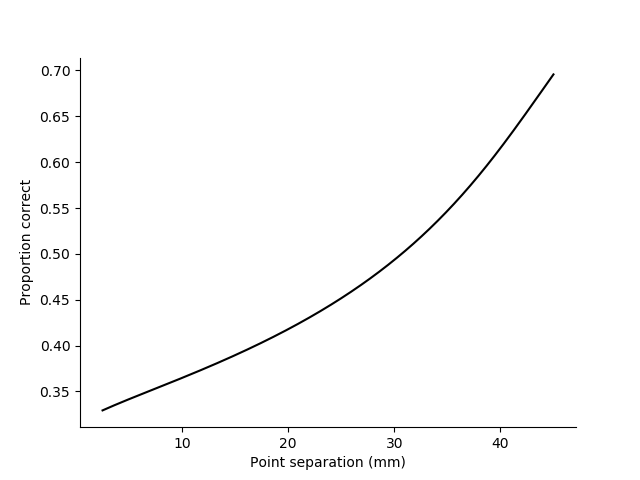

In [8]:
#first TS

spln = plotfunc_smooth(stimRange[0], postmean[0])

In [9]:
print(spln(eThreshold[0]))

0.6108271020934318


<IPython.core.display.Javascript object>


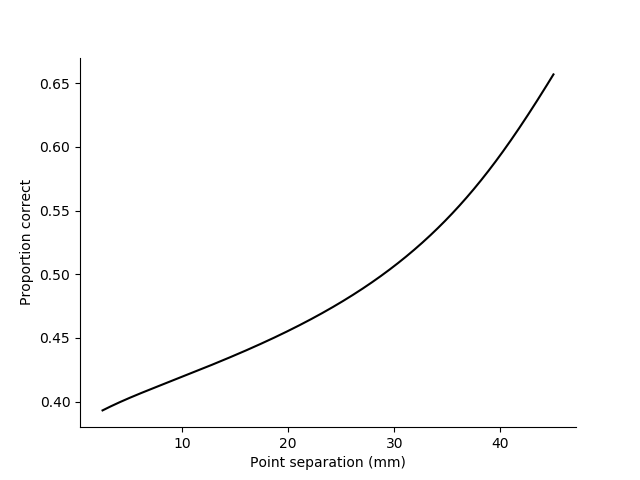

In [9]:
#mean over postmean values

spln = plotfunc_smooth(np.mean(stimRange, axis=0), np.mean(postmean, axis=0))

In [11]:
print(np.mean(eThreshold))
print(spln(np.mean(eThreshold)))

24.18719305690881
0.8849776348627215


In [10]:
meGuess = np.mean(eGuess)
meLapse = np.mean(eLapse)
meThreshold = np.mean(eThreshold)
meSlope = np.mean(eSlope)

mean_var_postmean = meGuess + (1 - meGuess - meLapse) * (1 - 2**((-(stimRange/meThreshold) ** meSlope)))

print(stimRange)
print(mean_var_postmean)

[array([ 2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5,
       30. , 32.5, 35. , 37.5, 40. , 42.5, 45. ]), array([ 2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5,
       30. , 32.5, 35. , 37.5, 40. , 42.5, 45. ])]
[[0.35294312 0.35302509 0.35336096 0.35422996 0.3560051  0.35914457
  0.36417918 0.37169356 0.38229906 0.39659678 0.41513022 0.43832853
  0.46644385 0.49948832 0.53717956 0.57890507 0.62371664 0.67036421]
 [0.35294312 0.35302509 0.35336096 0.35422996 0.3560051  0.35914457
  0.36417918 0.37169356 0.38229906 0.39659678 0.41513022 0.43832853
  0.46644385 0.49948832 0.53717956 0.57890507 0.62371664 0.67036421]]


<IPython.core.display.Javascript object>


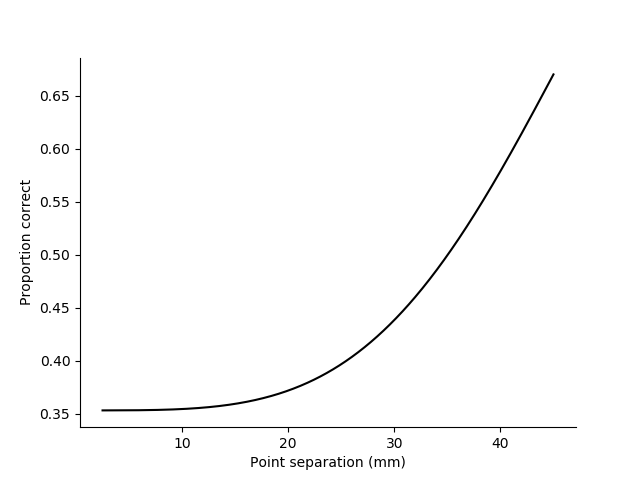

In [11]:
spln = plotfunc_smooth(stimRange[0], mean_var_postmean[0])